In [1]:
import pandas as pd
import pandasql as psql
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('ProyectMachineLearningMeals.csv')
df.head()

day            comida  week number    weekday  vegan  veggie  \
0  16/01/2023   crema zanahoria            3     monday      0       1   
1  16/01/2023  merluza con pure            3     monday      0       0   
2  17/01/2023         garbanzos            3    tuesday      1       1   
3  18/01/2023             crema            3  wednesday      0       1   
4  18/01/2023       pollo horno            3  wednesday      0       0   

   pescaterian  chicken  egg  beef  pork  carbon point  time   category  \
0            1        0    0     0     0             2    20    primero   
1            1        0    0     0     0             8    30  principal   
2            1        0    0     0     0             1    30  principal   
3            1        0    0     0     0             2    20    primero   
4            0        1    0     0     0             5    45  principal   

             group  excercise points                       meal  \
0          vegetal             233.0               carrot cream   
1  proteina animal               NaN  hake with mashed potatoes   
2          vegetal               NaN                  chickpeas   
3          vegetal               NaN                      cream   
4  proteina animal               NaN              roast chicken   

                        calories num calories  
0   150-200 calories per serving          175  
1   300-350 calories per serving          325  
2   150-200 calories per serving          175  
3   150-200 calories per serving          175  
4   250-300 calories per serving          275

In [118]:
# Define the SQL query
query = '''
SELECT weekday, meal, count(weekday) as number_meals
FROM df
GROUP BY weekday, meal
'''

# Execute the query
result_df = psql.sqldf(query, locals())

# Display the results
result_df.head()

weekday                     meal  number_meals
0  friday                     Soup             5
1  friday              beef fillet             1
2  friday  broccoli with fried egg             1
3  friday       broccoli with meat             1
4  friday        butterfly chicken             1

In [3]:
# Convert the 'date_string' column to datetime
df['date'] = pd.to_datetime(df['day'])

# Drop the original 'date_string' column if no longer needed
#df.drop(columns=['date_string'], inplace=True)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3560\1304782396.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['day'])


day            comida  week number    weekday  vegan  veggie  \
0  16/01/2023   crema zanahoria            3     monday      0       1   
1  16/01/2023  merluza con pure            3     monday      0       0   
2  17/01/2023         garbanzos            3    tuesday      1       1   
3  18/01/2023             crema            3  wednesday      0       1   
4  18/01/2023       pollo horno            3  wednesday      0       0   

   pescaterian  chicken  egg  beef  pork  carbon point  time   category  \
0            1        0    0     0     0             2    20    primero   
1            1        0    0     0     0             8    30  principal   
2            1        0    0     0     0             1    30  principal   
3            1        0    0     0     0             2    20    primero   
4            0        1    0     0     0             5    45  principal   

             group  excercise points                       meal  \
0          vegetal             233.0               carrot cream   
1  proteina animal               NaN  hake with mashed potatoes   
2          vegetal               NaN                  chickpeas   
3          vegetal               NaN                      cream   
4  proteina animal               NaN              roast chicken   

                        calories num calories       date  
0   150-200 calories per serving          175 2023-01-16  
1   300-350 calories per serving          325 2023-01-16  
2   150-200 calories per serving          175 2023-01-17  
3   150-200 calories per serving          175 2023-01-18  
4   250-300 calories per serving          275 2023-01-18

In [126]:
# Define a function to apply the logic
def calculate_meal(row):
    if row['beef'] == 1:
        return 'beef'
    elif row['chicken'] == 1:
        return 'Chicken'
    elif row['egg'] == 1:
        return 'Egg'
    elif row['pork'] == 1:
        return 'Pork'
    elif row['vegan'] == 1:
        return 'Vegetable'
    elif row['veggie'] == 1:
        return 'Non-meat/wDairy'
    elif row['pescaterian'] == 1:
        return 'Fish'
    else:
        return None  # You can adjust this to whatever makes sense for your data

# Apply the function to each row in the DataFrame
df['Calc_Meal'] = df.apply(calculate_meal, axis=1)

# Display the DataFrame
df.head()

day            comida  week number    weekday  vegan  veggie  \
0  16/01/2023   crema zanahoria            3     monday      0       1   
1  16/01/2023  merluza con pure            3     monday      0       0   
2  17/01/2023         garbanzos            3    tuesday      1       1   
3  18/01/2023             crema            3  wednesday      0       1   
4  18/01/2023       pollo horno            3  wednesday      0       0   

   pescaterian  chicken  egg  beef  ...   category            group  \
0            1        0    0     0  ...    primero          vegetal   
1            1        0    0     0  ...  principal  proteina animal   
2            1        0    0     0  ...  principal          vegetal   
3            1        0    0     0  ...    primero          vegetal   
4            0        1    0     0  ...  principal  proteina animal   

   excercise points                       meal                       calories  \
0             233.0               carrot cream   150-200 calories per serving   
1               NaN  hake with mashed potatoes   300-350 calories per serving   
2               NaN                  chickpeas   150-200 calories per serving   
3               NaN                      cream   150-200 calories per serving   
4               NaN              roast chicken   250-300 calories per serving   

   num calories       date        Calc_Meal     quarter week  
0           175 2023-01-16  Non-meat/wDairy  2023-03-31    3  
1           325 2023-01-16             Fish  2023-03-31    3  
2           175 2023-01-17        Vegetable  2023-03-31    3  
3           175 2023-01-18  Non-meat/wDairy  2023-03-31    3  
4           275 2023-01-18          Chicken  2023-03-31    3  

[5 rows x 23 columns]

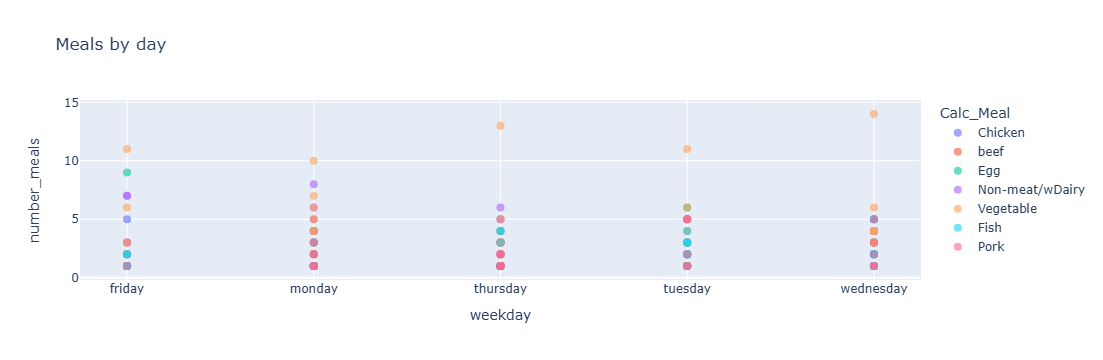

In [146]:
# Define the SQL query
query = '''
SELECT weekday, meal, count(weekday) as number_meals, Calc_meal
FROM df
GROUP BY weekday, meal, Calc_meal
'''

# Execute the query
result_df = psql.sqldf(query, locals())

# Interactive plot with Plotly
fig = px.scatter(result_df, x='weekday', y='number_meals', color='Calc_Meal', hover_name='meal',
                 title='Meals by day')
fig.update_traces(marker=dict(size=8, opacity=0.6))
fig.show()

In [112]:
# Define the SQL query
query = '''
SELECT weekday, calc_meal, count(weekday) as number_meals
FROM df
WHERE weekday != "none" AND category = "principal"
GROUP BY weekday, calc_meal
'''

# Execute the query
result_df2 = psql.sqldf(query, locals())

# Display the results
result_df2.head()

weekday  Calc_Meal  number_meals
0  friday    Chicken             5
1  friday        Egg            13
2  friday       Fish             8
3  friday       Pork             1
4  friday  Vegetable            18

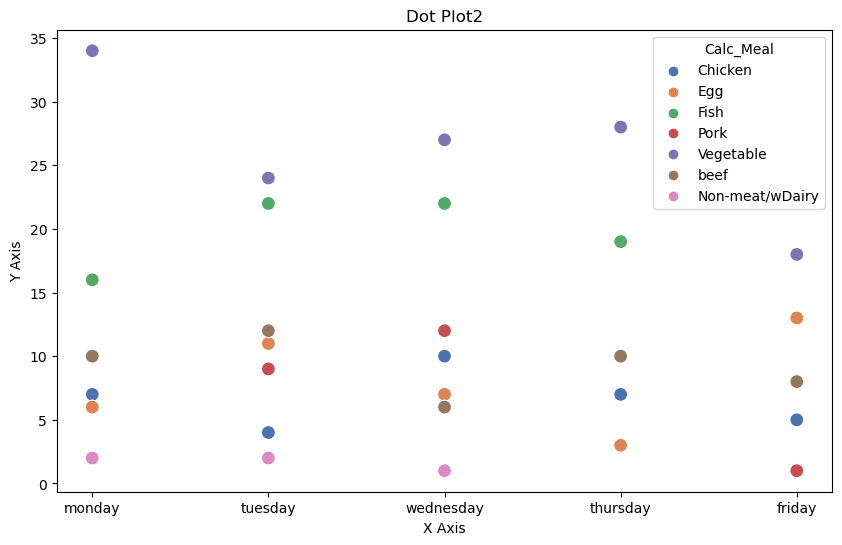

In [7]:
# Assuming df is your existing DataFrame
# Define the order of the days
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Convert the 'weekday' column to a categorical type with the specified order
result_df2['weekday'] = pd.Categorical(result_df2['weekday'], categories=day_order, ordered=True)


# Create the dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df2, x='weekday', y='number_meals', hue ="Calc_Meal", palette='deep', s=100)

# Add titles and labels
plt.title('Dot Plot2')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show the plot
plt.show()

In [110]:
df['quarter'] = df['date'].dt.to_period('Q')
df['quarter'] = df['quarter'].dt.strftime('%Y-%m-%d')
#df.head()

# Define the SQL query
query = '''
SELECT quarter, calc_meal, count(weekday) as number_meals
FROM df
WHERE weekday != "none" AND category = "principal"
GROUP BY quarter, calc_meal
'''

# Execute the query
result_df3 = psql.sqldf(query, locals())

# Display the results
result_df3.head()

quarter        Calc_Meal  number_meals
0  2023-03-31          Chicken             5
1  2023-03-31              Egg             7
2  2023-03-31             Fish            12
3  2023-03-31  Non-meat/wDairy             2
4  2023-03-31             Pork             7

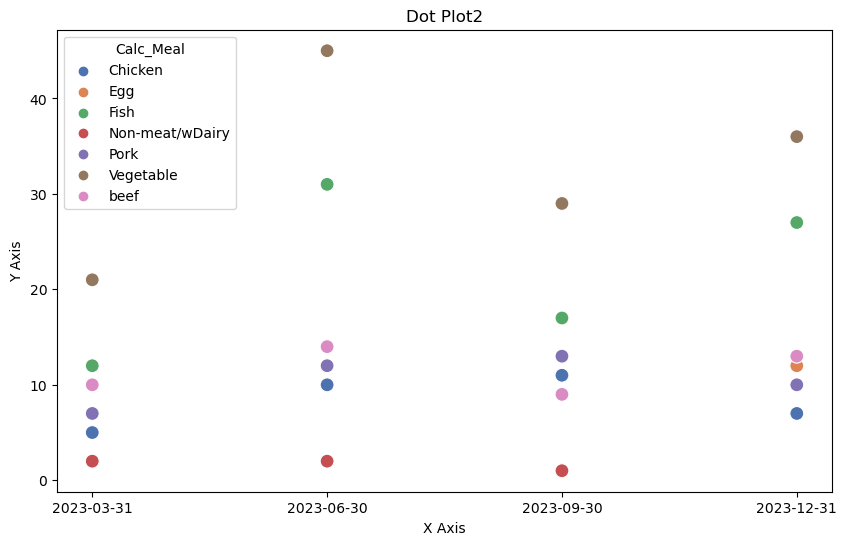

In [9]:
# Assuming df is your existing DataFrame
# Define the order of the days
#day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# Convert the 'weekday' column to a categorical type with the specified order
result_df3['quarter'] = pd.Categorical(result_df3['quarter'])


# Create the dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df3, x='quarter', y='number_meals', hue ="Calc_Meal", palette='deep', s=100)

# Add titles and labels
plt.title('Dot Plot2')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show the plot
plt.show()

In [10]:
# Convert the 'weekday' column to a categorical type with the specified order
result_df3['quarter'] = pd.Categorical(result_df3['quarter'])

# Define the SQL query
query = '''
SELECT meal,calc_meal ,AVG(`carbon point`), AVG (time), COUNT (meal)
FROM df
GROUP BY meal, calc_meal
'''

# Execute the query
result_df4 = psql.sqldf(query, locals())

# Display the results
result_df4

meal        Calc_Meal  AVG(`carbon point`)  \
0                  Russian salad             Fish                  8.0   
1                     Saxon loin             Pork                 13.0   
2                           Soup          Chicken                  5.0   
3    baked eggplant and zucchini        Vegetable                  1.0   
4                     baked fish             Fish                  8.0   
..                           ...              ...                  ...   
103                 tomato sauce        Vegetable                  1.0   
104                         tuna             Fish                  8.0   
105                turkey fillet          Chicken                  5.0   
106    turnip greens with potato        Vegetable                  1.0   
107               zucchini cream  Non-meat/wDairy                  2.0   

     AVG (time)  COUNT (meal)  
0          35.0             1  
1          15.0             2  
2          25.0            20  
3          45.0             1  
4          30.0             1  
..          ...           ...  
103        15.0             5  
104        20.0             2  
105        15.0             7  
106        30.0             1  
107        20.0            21  

[108 rows x 5 columns]

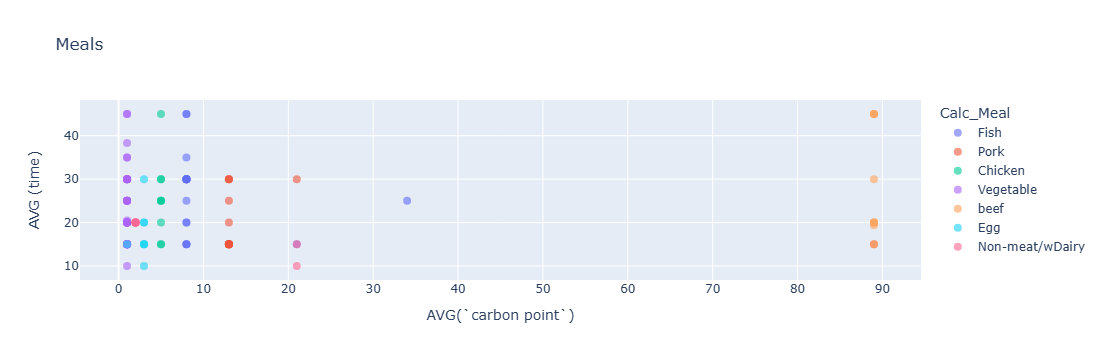

In [108]:
import plotly.express as px

# Interactive plot with Plotly
fig = px.scatter(result_df4, x='AVG(`carbon point`)', y='AVG (time)', color='Calc_Meal', hover_name='meal',
                 title='Meals')
fig.update_traces(marker=dict(size=8, opacity=0.6))
fig.show()

In [12]:
# Convert the 'weekday' column to a categorical type with the specified order
result_df3['quarter'] = pd.Categorical(result_df3['quarter'])

# Define the SQL query
query = '''
SELECT calc_meal ,AVG(`carbon point`), AVG (time), COUNT (meal)
FROM df
GROUP BY calc_meal
'''

# Execute the query
result_df5 = psql.sqldf(query, locals())

# Display the results
result_df5

Calc_Meal  AVG(`carbon point`)  AVG (time)  COUNT (meal)
0             None             0.000000    0.000000             7
1          Chicken             5.000000   25.298507            67
2              Egg             2.950000   21.750000            40
3             Fish             9.793103   30.632184            87
4  Non-meat/wDairy             2.940594   19.554455           101
5             Pork            15.000000   17.142857            42
6        Vegetable             1.000000   21.280488           246
7             beef            89.000000   30.000000            46

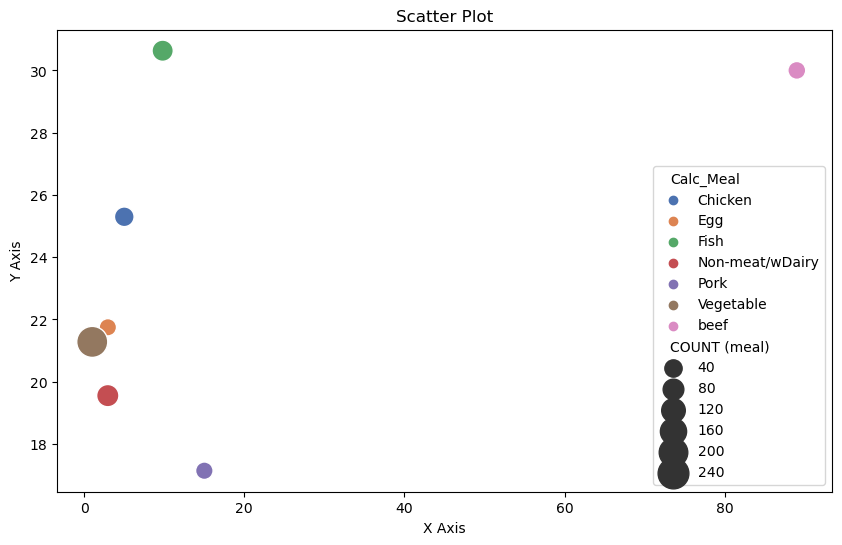

In [13]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=result_df5, x='AVG(`carbon point`)', y='AVG (time)', size='COUNT (meal)', hue='Calc_Meal', palette='deep', sizes=(100, 500))

# Add titles and labels
plt.title('Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show the plot
plt.show()

In [100]:
df['week'] = df['date'].dt.isocalendar().week

# Convert the 'weekday' column to a categorical type with the specified order
result_df3['quarter'] = pd.Categorical(result_df3['quarter'])

# Define the SQL query
query = '''
WITH weekly_calories AS (
    SELECT
        week,
         SUM(`num calories`)/5 AS num_calories,
        quarter
    FROM df
    GROUP BY week, quarter
),
quarterly_avg AS (
    SELECT
        quarter,
        AVG(num_calories) AS avg_calories_per_quarter
    FROM weekly_calories
    GROUP BY quarter
)
SELECT
q.quarter,
    w.week,
    w.num_calories,
    q.avg_calories_per_quarter
FROM weekly_calories w
JOIN quarterly_avg q ON w.quarter = q.quarter;


'''

# Execute the query
result_df6 = psql.sqldf(query, locals())

# Display the results
result_df6.head()

quarter  week  num_calories  avg_calories_per_quarter
0  2023-03-31     3         465.0                500.555556
1  2023-03-31     4         500.0                500.555556
2  2023-03-31     5         405.0                500.555556
3  2023-03-31     6         635.0                500.555556
4  2023-03-31     7         415.0                500.555556

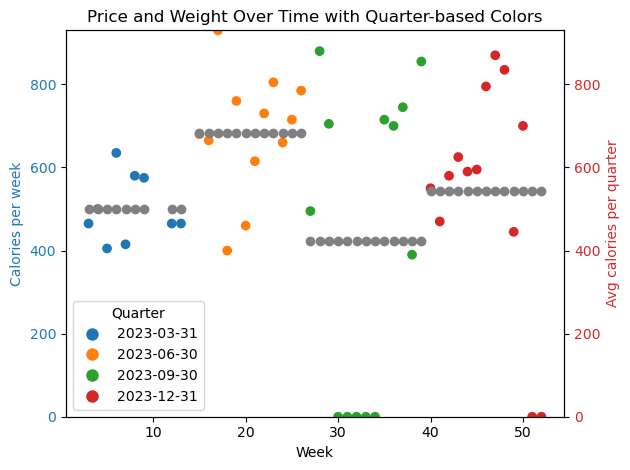

In [98]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Map quarters to specific colors
quarter_colors = {
    '2023-03-31': 'tab:blue',
    '2023-06-30': 'tab:orange',
    '2023-09-30': 'tab:green',
    '2023-12-31': 'tab:red'
}
colors = result_df6['quarter'].map(quarter_colors)

# Plot the first y-axis (price) with dots
ax1.set_xlabel('Week')
ax1.set_ylabel('Calories per week', color='tab:blue')
ax1.scatter(result_df6['week'], result_df6['num_calories'], color=colors, label='Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Avg calories per quarter', color='tab:red')
ax2.scatter(result_df6['week'], result_df6['avg_calories_per_quarter'], color="grey", label='Weight')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set the same min and max for both y-axes
min_y = min(result_df6['num_calories'].min(), result_df6['avg_calories_per_quarter'].min())
max_y = max(result_df6['num_calories'].max(), result_df6['avg_calories_per_quarter'].max())
ax1.set_ylim(min_y, max_y)
ax2.set_ylim(min_y, max_y)

# Add a legend to show the quarter colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=quarter) 
           for quarter, col in quarter_colors.items()]
ax1.legend(handles=handles, title='Quarter')

# Add title and show plot
plt.title('Price and Weight Over Time with Quarter-based Colors')
fig.tight_layout()
plt.show()

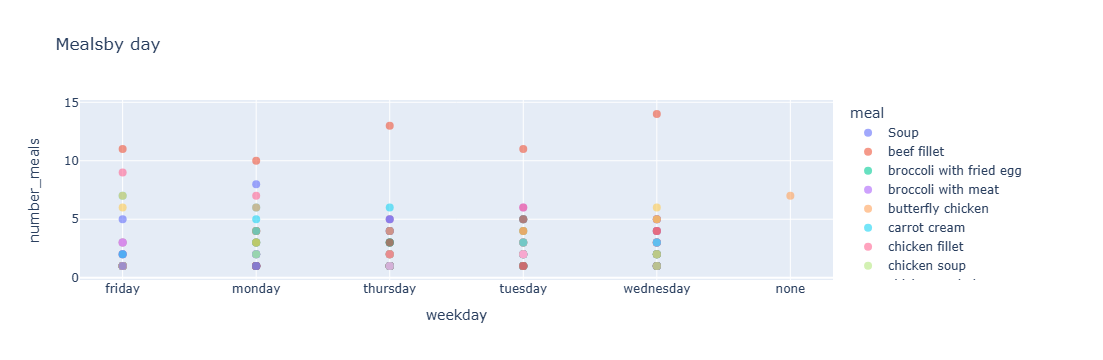